In [4]:
import torch
import matplotlib.pyplot as plt

# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


In [5]:
# learn texture from image
from Renderer import Renderer
from utils import remove_background ,squared_image

verts_T_paths = ['data/verts_T/0002_c1s2_064446_01.pkl']
# verts_T_paths = ['data/verts_T/0002_c2s1_123141_01.pkl']
euler_list = [[0,0,0]]#,[0,0,180]]

tm_paths = ['data/meta/default_texture.jpg']
# tm_paths = ['changed_texture_fpp_1.jpg']

image_path = 'data/images/0002_c1s2_064446_01.jpg'
seg_mask_path = "data/seg/0002_c1s2_064446_01.png" 

In [6]:
renderer = Renderer(device=device,image_resolution=128)
renderer.load_inputs(verts_T_paths,tm_paths = tm_paths,
                     euler_list = euler_list)
images = renderer.render()

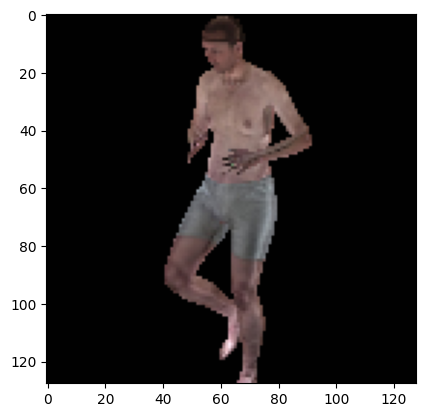

In [7]:
renderer.show()

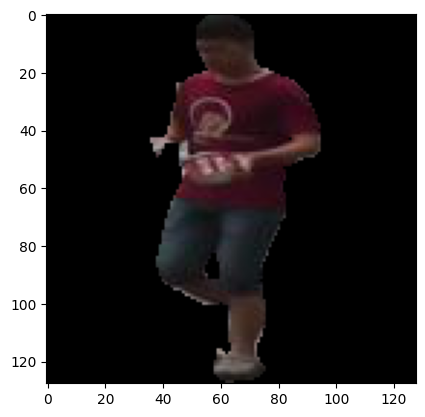

In [8]:

tgt = remove_background(image_path,seg_mask_path)
tgt = squared_image(tgt)
plt.imshow(tgt)

In [9]:
diff = images[0,...,:3] - torch.from_numpy(tgt).to(device)
loss = torch.sum(diff**2)
loss.backward()

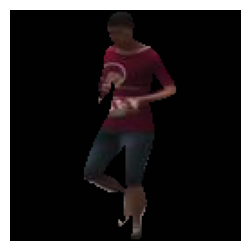

loss: 209.9822834700465


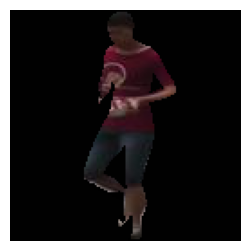

loss: 209.98228347004215


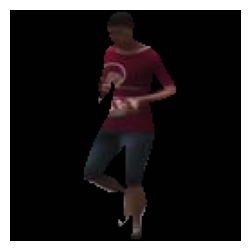

loss: 209.9822834700521


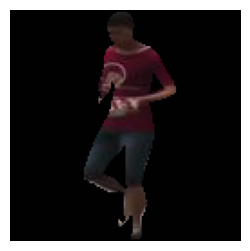

loss: 209.9822834801956


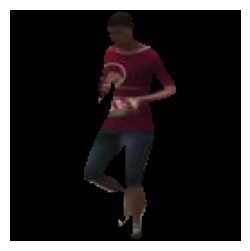

loss: 209.9822836286106


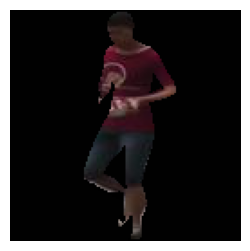

loss: 209.9822838282024


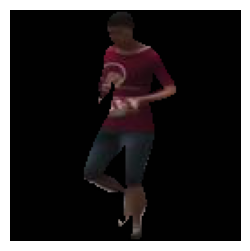

loss: 209.98228384900517


In [19]:
# training loop to learn texture and T from image
params = [ renderer.texture_map] #renderer.verts,renderer.T
optim = torch.optim.Adam(params,lr=0.1)
for i in range(2000):
    optim.zero_grad()
    images = renderer.render()
    diff = images[0,...,:3] - torch.from_numpy(tgt).to(device)
    loss = torch.sum(diff**2)
    loss.backward()
    optim.step()
    # print(loss.item())
    if i%300 == 0:
        plt.figure(figsize=(3,3))
        plt.imshow(images[0,...,:3].cpu().detach().numpy().clip(0,1))
        plt.axis('off')
        plt.show()
        
        # print(renderer.T)
        # print(renderer.texture_map)
        # print(renderer.verts)
        print('loss:',loss.item())
 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


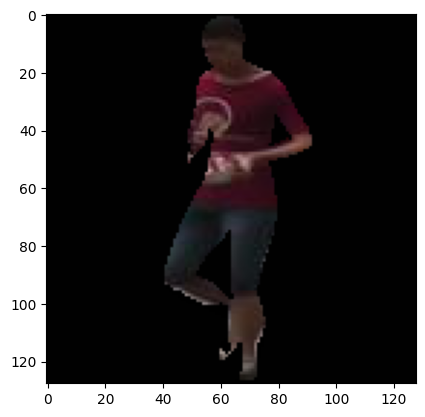

In [20]:
plt.imshow(images[0,...,:3].cpu().detach().numpy())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


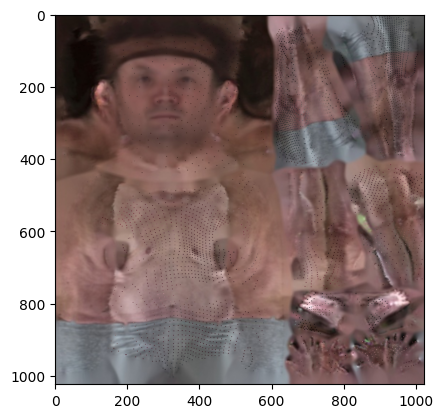

In [21]:
import numpy as np
texture = renderer.texture_map.cpu().detach().numpy()[0]
texture = texture/255
# texture = np.transpose(texture,(1,2,0))
plt.imshow(texture)


In [22]:
# save texture
plt.imsave("data/exp/changed_texture.jpg",texture.clip(0,1))

In [14]:
texture.max()

1.0